
**DAB103- CRIME DATA ANALYSIS - PROJECT**

1.   INTRODUCTION OF THE DATASET 
2.   DATA CLEANING AND DATA TRANSFROMATION 
3.   DATA ANALYSIS 
4.   CONCLUSION








**1.  INTRODUCTION TO DATASET**

We take dataset from Public Safety Data Portal 
referance by :  https://data.torontopolice.on.ca/datasets/TorontoPS::reported-crimes-asr-rc-tbl-001/explore




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly as plt
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
crime_dataset = pd.read_csv('/content/Reported_Crimes.csv')

**2. Cleaning Dataset and data transformation**

In [ ]:
crime_dataset.head()

,Index_,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId
0,1,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1
1,2,2014,D11,Crimes Against Property,Auto Theft,124,43,2
2,3,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3
3,4,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4
4,5,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5


**Dropping Unnecessary Columns**

In [ ]:
crime_dataset = crime_dataset.drop('Index_', axis=1)

In [ ]:
crime_dataset.head()

,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId
0,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1
1,2014,D11,Crimes Against Property,Auto Theft,124,43,2
2,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3
3,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4
4,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5


In [ ]:
crime_dataset.tail()

,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId
2696,2021,D43,Criminal Code Traffic,Other,134,117,2697
2697,2021,D43,Other Criminal Code Violations,Other,831,677,2698
2698,2021,D43,Other Criminal Code Violations,Other Criminal Violations - Offensive Weapons,90,81,2699
2699,2021,D43,Other Federal Statute Violations,Other,4,2,2700
2700,2021,D51,Controlled Drugs and Substances Act,Other,209,188,2701


In [ ]:
crime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2701 entries, 0 to 2700
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ReportedYear  2701 non-null   int64 
 1   GeoDivision   2701 non-null   object
 2   Category      2701 non-null   object
 3   Subtype       2701 non-null   object
 4   Count_        2701 non-null   int64 
 5   CountCleared  2701 non-null   int64 
 6   ObjectId      2701 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 147.8+ KB


In [ ]:
crime_dataset.columns

Index(['ReportedYear', 'GeoDivision', 'Category', 'Subtype', 'Count_',
       'CountCleared', 'ObjectId'],
      dtype='object')

In [ ]:
crime_dataset.describe()

,ReportedYear,Count_,CountCleared,ObjectId
count,2701.000000,2701.000000,2701.000000,2701.000000
mean,2017.492410,373.982969,161.260274,1351.000000
std,2.287089,660.664930,267.483140,779.855863
min,2014.000000,1.000000,0.000000,1.000000
25%,2016.000000,53.000000,15.000000,676.000000
50%,2017.000000,134.000000,56.000000,1351.000000
75%,2019.000000,380.000000,153.000000,2026.000000
max,2021.000000,7256.000000,2207.000000,2701.000000


**Checking Null Values in dataset**


In [ ]:
#Count how many nulls we have in each variable
crime_dataset.isnull().sum()
crime_dataset.fillna('', inplace=True) #changing the nulls to empty strings
crime_dataset.isnull().sum() #now there is not blanks in data

ReportedYear    0
GeoDivision     0
Category        0
Subtype         0
Count_          0
CountCleared    0
ObjectId        0
dtype: int64

In [ ]:
crime_dataset.shape

(2701, 7)

In [ ]:
crime_dataset.shape[0]

2701

In [ ]:
crime_dataset.shape[1]

7

In [ ]:
type(crime_dataset.Count_)

pandas.core.series.Series

**Data Transformation**



*  Making DataFrame For sub category of crime



In [ ]:
count_of_crime_by_subtyp = crime_dataset.groupby(['Subtype']).size(); count_of_crime_by_subtyp
subcategory=pd.DataFrame(count_of_crime_by_subtyp)
subcategory.rename(columns={0:'count'},inplace = True)
subcategory
subcategory_data = crime_dataset['Subtype'].value_counts().rename_axis('SubCat').reset_index(name = 'counts')
subcategory_data


,SubCat,counts
0,Other,816
1,Auto Theft,136
2,Break & Enter-Apartment,136
3,Break & Enter-Commercial,136
4,Break & Enter-House,136
5,Fraud,136
6,Theft Over $5000,136
7,Theft Under $5000,136
8,Assault,136
9,Robbery-Other,136


* Data Frame for Main Category

In [ ]:
count_of_crime_by_subtyp = crime_dataset.groupby(['Category']).size(); count_of_crime_by_subtyp
main_category=pd.DataFrame(count_of_crime_by_subtyp)
main_category.rename(columns={0:'count'},inplace = True)
main_category

,count
Category,
Controlled Drugs and Substances Act,136
Crimes Against Property,1222
Crimes Against the Person,799
Criminal Code Traffic,136
Other Criminal Code Violations,272
Other Federal Statute Violations,136


In [ ]:
main_category_data = crime_dataset['Category'].value_counts().rename_axis('Cat').reset_index(name = 'counts')
main_category_data

,Cat,counts
0,Crimes Against Property,1222
1,Crimes Against the Person,799
2,Other Criminal Code Violations,272
3,Controlled Drugs and Substances Act,136
4,Criminal Code Traffic,136
5,Other Federal Statute Violations,136


In [ ]:
x = main_category_data.Cat
y = main_category_data.counts
explode_r = [0.1,0.1,0.1,0.1,0.1,0.1]

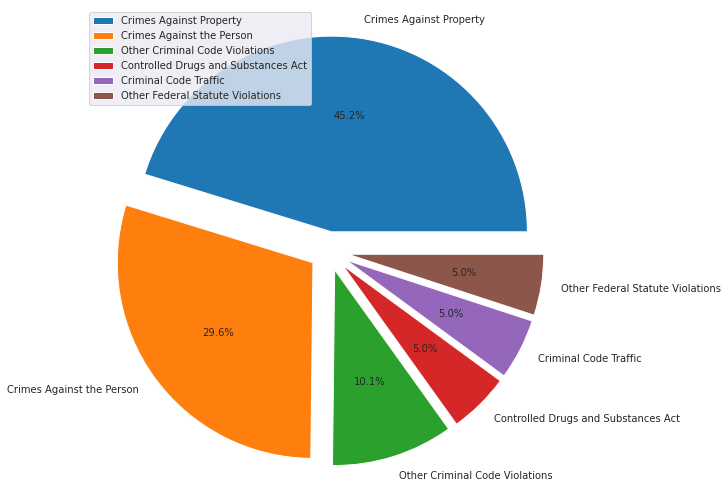

In [ ]:
from enum import auto
import matplotlib.pyplot as plt
plt.figure(figsize = (10,9))
plt.pie(main_category_data["counts"],labels = main_category_data["Cat"],autopct='%0.1f%%',explode=explode_r)
plt.legend(loc=2)
plt.show()



*   Cheking Any Category for Count
*   Cheking all the data for only one of the crime category that is reported




In [ ]:
crime_dataset.Subtype == 'Break & Enter-Apartment'

0       False
1       False
2        True
3       False
4       False
        ...  
2696    False
2697    False
2698    False
2699    False
2700    False
Name: Subtype, Length: 2701, dtype: bool

In [ ]:
Break_enter_apartment =  crime_dataset[crime_dataset.Subtype == 'Break & Enter-Apartment']
Break_enter_apartment

,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId
2,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3
22,2014,D12,Crimes Against Property,Break & Enter-Apartment,76,44,23
42,2014,D13,Crimes Against Property,Break & Enter-Apartment,62,20,43
51,2014,D42,Crimes Against Property,Break & Enter-Apartment,57,15,52
71,2014,D43,Crimes Against Property,Break & Enter-Apartment,151,58,72
...,...,...,...,...,...,...,...
2596,2021,D14,Crimes Against Property,Break & Enter-Apartment,179,59,2597
2616,2021,D22,Crimes Against Property,Break & Enter-Apartment,84,25,2617
2635,2021,D31,Crimes Against Property,Break & Enter-Apartment,72,19,2636
2663,2021,D42,Crimes Against Property,Break & Enter-Apartment,48,13,2664


In [ ]:
crime_dataset.corr()

,ReportedYear,Count_,CountCleared,ObjectId
ReportedYear,1.000000,0.017948,-0.063571,0.977183
Count_,0.017948,1.000000,0.806702,0.024291
CountCleared,-0.063571,0.806702,1.000000,-0.053293
ObjectId,0.977183,0.024291,-0.053293,1.000000


**Data Transformation for adding one column in dataset**

*   Adding Coulmns using if and else 
*   Spliting the Province and City so we can get accurate result in map for location.



In [ ]:


address = []
for value in crime_dataset["GeoDivision"]:
  if value == 'D11':
    address.append("2054 Davenport Rd, Toronto, Ontario")
  elif value == 'D12':
    address.append("200 Trethewey Dr, North York, ON M6M 5E6")
  elif value == 'D13':
    address.append("1435 Eglinton Ave W, York, ON M6C 3Z4")
  elif value == 'D14' :
    address.append("350 Dovercourt Rd, Toronto, ON M6J 3E3")
  elif value == 'D22' :
    address.append("3699 Bloor St W, Etobicoke, ON M9A 1A2") 
  elif value == 'D23' :
    address.append("5230 Finch Ave W, Etobicoke, ON M9V 0A1")
  elif value == 'D31' :
    address.append("40 Norfinch Dr, North York, ON M3N 1X1")
  elif value == 'D32' :
    address.append("30 Ellerslie Ave, North York, ON M2N 1X8")
  elif value == 'D33':
    address.append("50 Upjohn Rd, North York, ON M3B 2W1")   
  elif value == 'D41' :
    address.append("2222 Eglinton Ave E, Scarborough, ON M1K 2M2")
  elif value == 'D42' :
    address.append("242 Milner Ave, Scarborough, ON M1S 5C4")
  elif value == 'D43' :
    address.append("4331 Lawrence Ave E, Scarborough, ON M1E 2T4")
  elif value == 'D51':
    address.append("51 Parliament St, Toronto, ON M5A 2Y5")
  elif value == 'D52' :
    address.append("255 Dundas St W, Toronto, ON M5T 2W5")
  elif value == 'D53' :
    address.append("75 Eglinton Ave W, Toronto, ON M4R 2G9")
  elif value == 'D44/D55' :
    address.append("101 Coxwell Ave, Toronto, ON M4L 3B3")
  elif value == 'NSA':
    address.append("51 Parliament St, Toronto, ON M5A 2Y5")
  else:
    address.append("NA")
crime_dataset["police_station_address"] = address
crime_dataset = pd.DataFrame(crime_dataset)
crime_dataset.head()

,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address
0,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario"
1,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario"
2,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario"
3,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario"
4,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario"


In [ ]:
name1=crime_dataset["police_station_address"].str.split(", ", expand = True)
crime_dataset["PO_ADD"] = name1[1]
crime_dataset.head()

,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD
0,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario",Toronto
1,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario",Toronto
2,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario",Toronto
3,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario",Toronto
4,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario",Toronto


**Reported Crime According to Province**


In [ ]:
address = crime_dataset['PO_ADD'].value_counts().rename_axis('Province').reset_index(name = 'counts')
address

,Province,counts
0,Toronto,948
1,North York,637
2,Scarborough,479
3,Etobicoke,319
4,York,158


In [ ]:
Province_count_total=df.groupby(crime_dataset['Count_']).size().reset_index().groupby(crime_dataset["PO_ADD"]).max()
Province_count_total


,Count_,0
PO_ADD,,
Etobicoke,308,2
North York,556,2
Scarborough,182,3
Toronto,5483,4
York,84,3


In [324]:
subcategory_1=pd.DataFrame(Province_count_total).reset_index()
subcategory_1.rename(columns={'PO_ADD':'Province','Count_':'count',0:'none'},inplace = True)
subcategory_1.drop('none',axis=1,inplace=True)
subcategory_1

,Province,count
0,Etobicoke,308
1,North York,556
2,Scarborough,182
3,Toronto,5483
4,York,84


In [ ]:
Province_CountCleared_total=df.groupby(crime_dataset['CountCleared']).size().reset_index().groupby(crime_dataset["PO_ADD"]).max()
Province_count_total


,CountCleared,0
PO_ADD,,
Etobicoke,394,3
North York,1027,4
Scarborough,162,2
Toronto,2207,8
York,60,3


In [ ]:
subcategory_1=pd.DataFrame(Province_CountCleared_Total).reset_index()
subcategory_1.rename(columns={'PO_ADD':'Province','Count_':'count',0:'none'},inplace = True)
subcategory_1.drop('none',axis=1,inplace=True)
subcategory_1

,Province,CountCleared
0,Etobicoke,394
1,North York,1027
2,Scarborough,162
3,Toronto,2207
4,York,60


In [ ]:
#Count how many nulls we have in each variable
crime_dataset.isnull().sum()
crime_dataset.fillna('', inplace=True) #changing the nulls to empty strings
crime_dataset.isnull().sum() #now there is not blanks in data

ReportedYear              0
GeoDivision               0
Category                  0
Subtype                   0
Count_                    0
CountCleared              0
ObjectId                  0
police_station_address    0
PO_ADD                    0
dtype: int64

In [ ]:
Province_count_cleared=df.groupby(crime_dataset['CountCleared']).size().reset_index().groupby(crime_dataset["PO_ADD"]).max()
Province_count_cleared

,CountCleared,0
PO_ADD,,
Etobicoke,394,3
North York,1027,4
Scarborough,162,2
Toronto,2207,8
York,60,3


In [ ]:
subcategory_1=pd.DataFrame(Province_count_cleared).reset_index()
subcategory_1.rename(columns={'PO_ADD':'Province','Count_':'count',0:'none'},inplace = True)
subcategory_1.drop('none',axis=1,inplace=True)
subcategory_1

**3. DATA ANALYSIS FOR CRIME DATASET**



*   Cheking Correaltion for finding the best fitted realtion in between columns



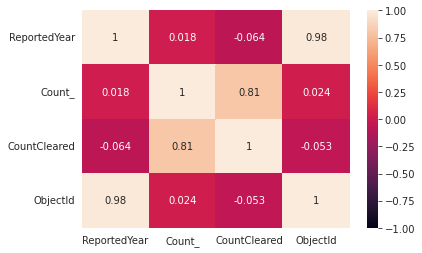

In [ ]:
#sns.heatmap(data.corr());
heatmap = sns.heatmap(crime_dataset.corr(), vmin=-1, vmax=1, annot=True)
heatmap

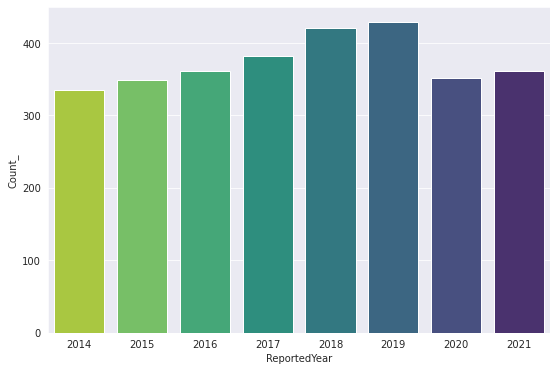

In [ ]:
from matplotlib.pylab import subplot
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')
g1 = sns.barplot(data=crime_dataset, x='ReportedYear', y='Count_',
                ci=False, palette='viridis_r')
plt.show()

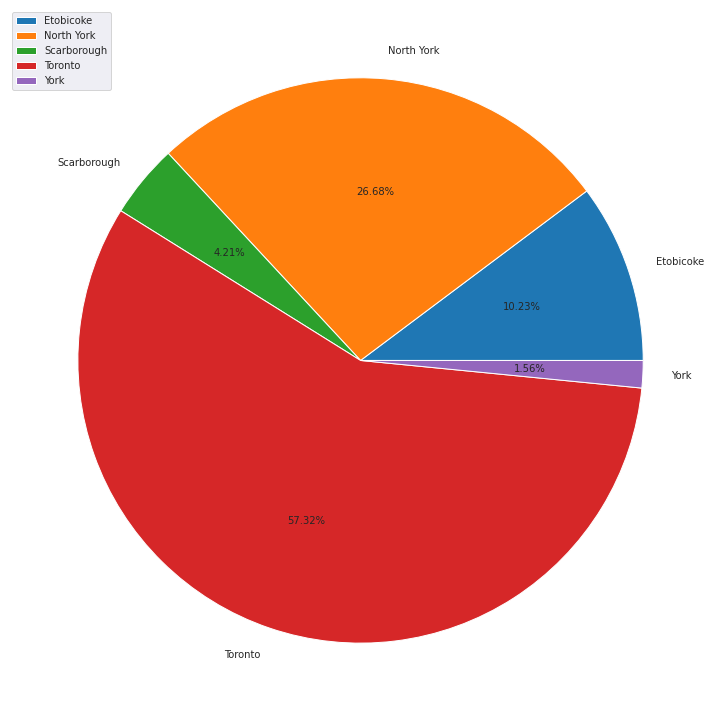

In [ ]:
from enum import auto
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.pie(subcategory_1["CountCleared"],labels = subcategory_1["Province"],autopct='%0.2f%%')
plt.legend(loc=2)
plt.show()

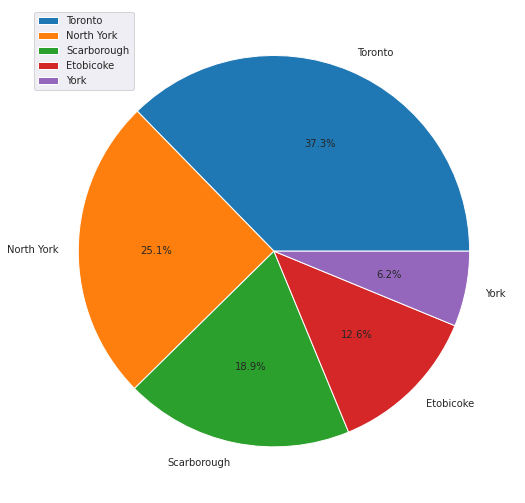

In [ ]:
from enum import auto
import matplotlib.pyplot as plt
plt.figure(figsize = (10,9))
plt.pie(address["counts"],labels = address["Province"],autopct='%0.1f%%')
plt.legend(loc=2)
plt.show()

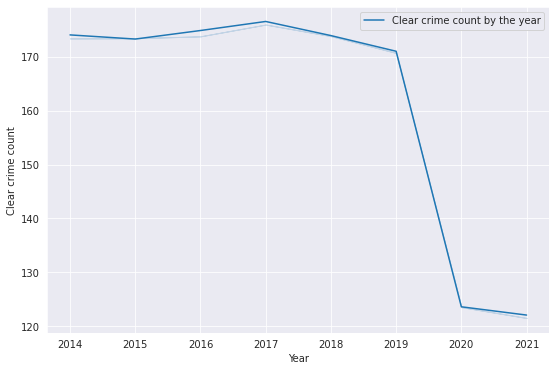

In [ ]:
from matplotlib import axes
import matplotlib.pyplot as plt 
plt.figure(figsize=(9,6))
g1 = sns.lineplot(data=crime_dataset, x='ReportedYear', y='CountCleared',markers='o',sort = False,label = 'Clear crime count by the year',
                ci=False,)
g1.set(xlabel = "Year",ylabel="Clear crime count")
plt.show()

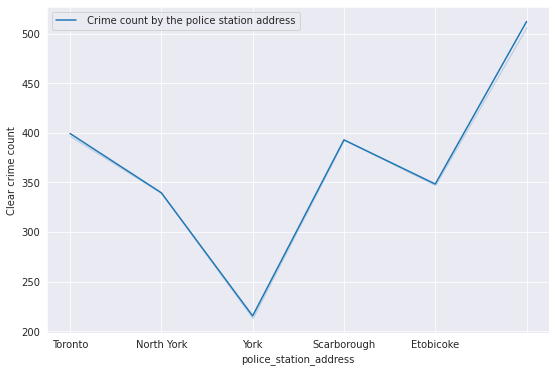

In [ ]:
from matplotlib import axes
import matplotlib.pyplot as plt 
plt.figure(figsize=(9,6))
g1 = sns.lineplot(data=crime_dataset, x='PO_ADD', y='Count_',markers='o',sort = False,label = ' Crime count by the police station address',
                ci=False,)
g1.set(xlabel = "police_station_address",ylabel="Clear crime count")
plt.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig1 = px.box(crime_dataset, x="Subtype" ,y="Count_")
fig1.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig1 = px.scatter(crime_dataset, x="CountCleared" ,y="Subtype")
fig1.show()

In [ ]:
#duplicated the data set to create the geocode
dataH_Map = crime_dataset
dataH_Map.head()

,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD,Lon,Lat
0,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
1,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
2,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
3,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
4,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035


In [ ]:
dataH_Map = dataH_Map.loc[:200,:]
dataH_Map.head()

,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD,Lon,Lat
0,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
1,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
2,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
3,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
4,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035


**Checking longitude and latitude using geopy**

In [ ]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent='myGeocoder')
police_station_address	 = locator.geocode(' Ontario, Canada')
print(police_station_address.address)
print((police_station_address.latitude, police_station_address.longitude))

Ontario, Canada
(50.000678, -86.000977)


In [ ]:
import matplotlib.pyplot as plt#
!pip install geopandas
import geopandas as gpd
import folium
from folium import plugins
import datetime
import math
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from operator import add
geo = Nominatim(user_agent="myapp")


dataH_Map['Lon'] = ''
dataH_Map['Lat'] = ''

for i in range(0, len(dataH_Map)):
  police_station_address = geo.geocode(dataH_Map['police_station_address'][i], timeout = 10)
  try:
    dataH_Map['Lon'][i] = police_station_address.longitude
    dataH_Map['Lat'][i] = police_station_address.latitude
  except:
    dataH_Map['Lon'][i] = ''
    dataH_Map['Lat'][i] = ''

dataH_Map.head()

<ipython-input-88-83c4ad40703a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-83c4ad40703a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-83c4ad40703a>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-83c4ad40703a>:12: SettingWithCopyWarning:


A value is trying t

,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD,Lon,Lat
0,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
1,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
2,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
3,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
4,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035


In [ ]:
dataH_Map['Lon'].replace('', np.nan, inplace = True)
dataH_Map['Lat'].replace('', np.nan, inplace = True)
dataH_Map.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD,Lon,Lat
0,2014,D11,Controlled Drugs and Substances Act,Other,201,195,1,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
1,2014,D11,Crimes Against Property,Auto Theft,124,43,2,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
2,2014,D11,Crimes Against Property,Break & Enter-Apartment,85,37,3,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
3,2014,D11,Crimes Against Property,Break & Enter-Commercial,58,18,4,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035
4,2014,D11,Crimes Against Property,Break & Enter-House,89,34,5,"2054 Davenport Rd, Toronto, Ontario",Toronto,-79.460554,43.671035


In [ ]:
dataH_Map.dropna(subset=['Lon'], inplace=True)
dataH_Map.tail(35)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ReportedYear,GeoDivision,Category,Subtype,Count_,CountCleared,ObjectId,police_station_address,PO_ADD,Lon,Lat
166,2014,D52,Crimes Against Property,Other,815,395,167,"255 Dundas St W, Toronto, ON M5T 2W5",Toronto,-79.389598,43.654203
167,2014,D52,Crimes Against Property,Theft Over $5000,91,28,168,"255 Dundas St W, Toronto, ON M5T 2W5",Toronto,-79.389598,43.654203
168,2014,D52,Crimes Against Property,Theft Under $5000,5483,2207,169,"255 Dundas St W, Toronto, ON M5T 2W5",Toronto,-79.389598,43.654203
169,2014,D52,Crimes Against the Person,Assault,1125,817,170,"255 Dundas St W, Toronto, ON M5T 2W5",Toronto,-79.389598,43.654203
170,2014,D52,Crimes Against the Person,Attempt Murder,2,2,171,"255 Dundas St W, Toronto, ON M5T 2W5",Toronto,-79.389598,43.654203
171,2014,D52,Crimes Against the Person,Other,339,212,172,"255 Dundas St W, Toronto, ON M5T 2W5",Toronto,-79.389598,43.654203
172,2014,D52,Crimes Against the Person,Robbery-Financial,4,4,173,"255 Dundas St W, Toronto, ON M5T 2W5",Toronto,-79.389598,43.654203
173,2014,D52,Crimes Against the Person,Robbery-Other,164,62,174,"255 Dundas St W, Toronto, ON M5T 2W5",Toronto,-79.389598,43.654203
174,2014,D52,Crimes Against the Person,Sexual Violation,135,80,175,"255 Dundas St W, Toronto, ON M5T 2W5",Toronto,-79.389598,43.654203
175,2014,D52,Criminal Code Traffic,Other,84,84,176,"255 Dundas St W, Toronto, ON M5T 2W5",Toronto,-79.389598,43.654203


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [ ]:
import matplotlib.pyplot as plt#
!pip install geopandas
import geopandas as gpd
import folium
from folium import plugins
import datetime
import math


lon = dataH_Map['Lon'].mean()
lat = dataH_Map['Lat'].mean()
data_map = folium.Map([lat, lon], zoom_start = 10, prefer_canvas=True, control_scale=True, width='80%', height='80%')
#tiles = 'Stamen Toner'
#tiles = 'cartodbpositron'

html = '''1st line<br>
2nd line<br>
3rd line'''

iframe = folium.IFrame(html,
                       width=100,
                       height=100)

data_crime_map = plugins.MarkerCluster().add_to(data_map)
for lat,lon,label in zip(dataH_Map['Lat'],dataH_Map['Lon'],dataH_Map['police_station_address']):
   folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(data_crime_map)
data_map.add_child(data_crime_map)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#its show relasitionship between clear crime count compare to crime count



import plotly.express as px

df = px.data.tips()
fig = px.scatter(
    crime_dataset, x='CountCleared', y='Count_', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()